## Class 13

* Statistical analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
import datetime
from scipy import stats

# Global warming signatures on the temperature data of Stockholm

In [2]:
stockholm = np.genfromtxt('stockholm_temperatures.dat')

In [4]:
len(stockholm[(stockholm[:,0]==1800),3])

365

####  Create dates list of dates using datetime

In [5]:
date_format = "%Y-%m-%d"
dates = []
for st in stockholm:
    str = "%d-%02d-%02d" % (st[0],st[1],st[2])
    d = datetime.datetime.strptime(str,date_format)
    dates.append(d)
print(dates[:5])

[datetime.datetime(1800, 1, 1, 0, 0), datetime.datetime(1800, 1, 2, 0, 0), datetime.datetime(1800, 1, 3, 0, 0), datetime.datetime(1800, 1, 4, 0, 0), datetime.datetime(1800, 1, 5, 0, 0)]


#### Create a list with yearly averages, and then plot it

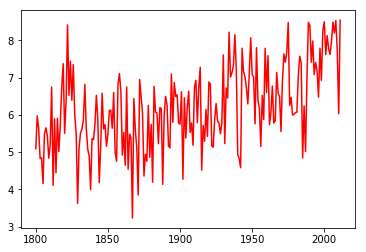

In [6]:
ya = np.zeros(2012-1800,dtype=float)
n = np.zeros(2012-1800,dtype=int)
for st in stockholm:
    i = int(st[0]-1800)
    ya[i] += st[3]
    n[i] += 1
ya /= n
plt.figure(figsize=(6, 4))
plt.plot(np.arange(len(ya))+1800, ya,'r-')
plt.show()

***

In [7]:
av = ya[:-30].mean()
std = ya[:-30].std()
print(av,std)

5.990009496828494 0.9892354049046646


### Linear fit

In [8]:
def test_lin(x, a, b):
    return a * x + b
linfit, params_covariance = optimize.curve_fit(test_lin, range(len(ya)), ya)
print(linfit)

[0.00975768 5.16776957]


#### Let us try random data

In [9]:
for tmp in range(10):
    linfit, params_covariance = \
        optimize.curve_fit(test_lin, range(len(ya)), np.random.normal(av,std,len(ya)))
    print(linfit[0]/0.00975768)

0.1151415499212314
-0.04683407666208195
0.05146290655395127
0.0315986249852356
-0.023453880243866146
-0.07271237954077477
0.23187390924446477
0.1412909407221345
-0.08824441083283292
-0.06370038341139422


In [10]:
#Make a statistic in one line :-)
a = np.array([abs(optimize.curve_fit(test_lin, range(len(ya)), np.random.normal(av,std,len(ya)))[0][0])/0.00975768 for i in range(100)])
print(a.mean(),a.max())

0.08819999652969197 0.2958632349777161


#### Result
Small gradient, which is 10 times larger than what random data would give and also 3 times larger than the maximal random increase from 100 random samples.

***

### Pearson correlation coefficient
Let $X$ and $Y$ be random data with variances $\sigma_X$ and $\sigma_Y$ respectively.
The population Pearson correlation coefficient is
$$ \rho_{X,Y}=\frac{\mathrm{E}[(X-\mu_X)(Y-\mu_Y)]}{\sigma_X\sigma_Y},$$
where E is the expectation value, $\mu_X$ and $\mu_Y$ are the average of $X$ and $Y$ respectively

Value between $[-1,1]$:

<img src="https://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg">

In [11]:
print(stats.pearsonr(np.arange(len(ya)),ya))

(0.5387341261900571, 2.350337772995622e-17)


#### Result
Pcc (Pearson correlation coefficient) is larger than 0.5 it has a clear increasing trend.

***

### P-value
Probability to obtain more extreme event than observed under the given null model.
<img src="https://upload.wikimedia.org/wikipedia/commons/3/3a/P-value_in_statistical_significance_testing.svg" width=640px>
#### Result:
Missconception: p-value is small (generally less than 0.05) then there is less than a 5% chance that the null hypothesis is right and we are 95% confident that the positive result is a true effect.<br>
<b>In reality:</b> It says that there is less than 5% chance that the data came from a process described by the null model. The value is sample size dependent and measuring on a new dataset the p-value may be totally different


In [12]:
print(stats.ttest_ind(ya[:-30], ya[-30:]))
print(stats.ttest_ind(ya[:-30], ya[:30]))

Ttest_indResult(statistic=-7.515929659546854, pvalue=1.608891773848803e-12)
Ttest_indResult(statistic=1.258954457057564, pvalue=0.20944444301375775)


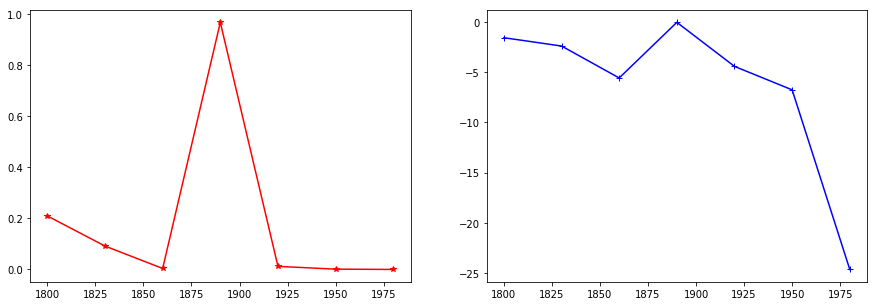

In [13]:
px = []
py = []
for i in range(0,210,30):
    px.append(1800 + i)
    py.append(stats.ttest_ind(ya[:-30], ya[i:i + 30])[1])
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
ax[0].plot(px, py,'r-*');
ax[1].plot(px,np.log(np.array(py)),'b-+');

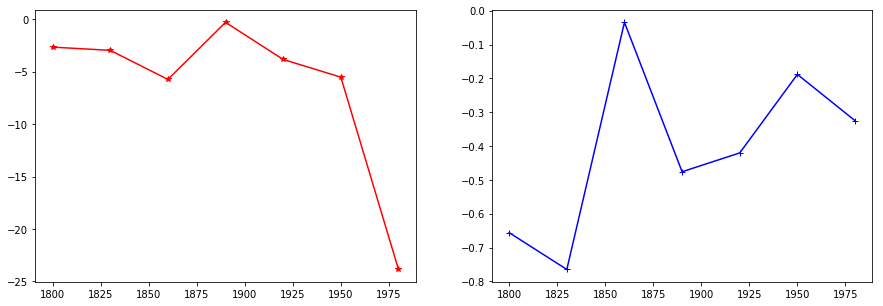

In [14]:
px = []
py = []
py2 = []
for i in range(0,210,30):
    px.append(1800 + i)
    py.append(stats.ttest_ind(np.random.normal(av,std,180), ya[i:i + 30])[1])
    py2.append(stats.ttest_ind(np.random.normal(av,std,180), np.random.normal(av,std,30))[1])

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
ax[0].plot(px, np.log(np.array(py)),'r-*');
ax[1].plot(px,np.log(np.array(py2)),'b-+');


### Kolmogorov–Smirnov test
Measures the difference of the cumulative distributions. Let us have a model with cumulative distribution $F(x)$ and cumulative distribution of the observations with $F_n(x)$. The Kolmogorov–Smirnov statistic is
$$D_n=\mathrm{sup}_x|F_n(x)-F(x)|,$$
where $\mathrm{sup}$ is the maximum of the set of distances.<br>
For two datasets (with $n$ and $m$ elements) the null hyphothesis is rejected at level $\alpha$ if
$$D_{n,m}>c(\alpha)\sqrt{\frac{n+m}{nm}}$$
with
<table>
    <tr><td>$\ \ \ \alpha\ \ \ \ $</td><td>0.10</td><td>0.05</td><td>0.01</td><td>0.001</td></tr>
    <tr><td>$c(\alpha)$</td><td>1.073</td><td>1.224</td><td>1.517</td><td>1.858</td></tr>
</table>

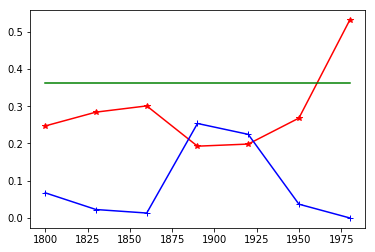

In [15]:
calpha=[1.073,1.224,1.517,1.858]
px = []
py1 = []
py2 = []
for i in range(0,210,30):
    px.append(1800 + i)
    py1.append(stats.ks_2samp(ya, ya[i:i + 30])[0])
    py2.append(stats.ks_2samp(ya, ya[i:i + 30])[1])
plt.figure(figsize=(6, 4))
plt.plot(px, py1, 'r-*')
plt.plot(px, py2, 'b-+')
plt.plot(px, np.array(px)*0+np.sqrt((210+30)/210/30)*calpha[3], 'g-')
plt.show()

#### Get the positions of the years in the stockholm array
e.g.  yp = \[0, 365, 730, 1095, 1460, 1826, 2191, 2556, 2921, 3287 ...<br>
You will need this to be able to reference the stockholm array by years. E.g.<br>
<pre>
stockholm[yp[i]:yp[i+5]]
</pre>
Will give you the array containing data from year i ro year y+5

In [16]:
yp = []
y = 0
for i in range(len(stockholm)):
    if stockholm[i][0] != y:
        yp.append(i)
        y = stockholm[i][0]
print(yp[:10])

[0, 365, 730, 1095, 1460, 1826, 2191, 2556, 2921, 3287]


#### Create the average temperature profile for a year
* Easy?
* What to do with 29th February? Skip it.

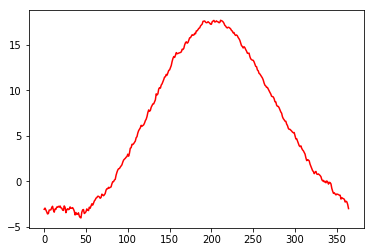

In [17]:
yaT = np.zeros(365,dtype=float)
for a in range(365):
    for i in range(2012-1800):
        yaT[a] += stockholm[yp[i]+a][3]
yaT /= (2012-1800)
plt.figure(figsize=(6, 4))
plt.plot(np.arange(365), yaT,'r-')
plt.show()

#### Change numbers to months on x axes
<pre>
mp = [0, 31, 59, 90, 120, 151, 181, 212, 243, 273, 304, 334]
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(mp, months)
</pre>
Plot one year's data on top of it

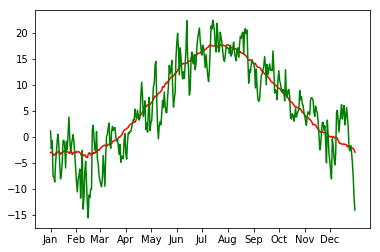

In [18]:
yaT = np.zeros(365,dtype=float)
mp = [0, 31, 59, 90, 120, 151, 181, 212, 243, 273, 304, 334]
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
for a in range(365):
    for i in range(2012-1800):
        yaT[a] += stockholm[yp[i]+a][3]
yaT /= (2012-1800)
plt.figure(figsize=(6, 4))
plt.plot(np.arange(365), yaT,'r-')
plt.plot(np.arange(365),stockholm[yp[100]:yp[100]+365][:,3],'g-')
plt.xticks(mp, months)
plt.show()

#### Create and plot the array which is the deseasonned temperature. Remove the average temperature from the original data (watch out for the leap day, you may leave it to the end of the year)

In [20]:
yaT366 = np.zeros(366,dtype = float)
for a in range(365):
    yaT366[a] = yaT[a]
yaT366[365] = yaT[364]

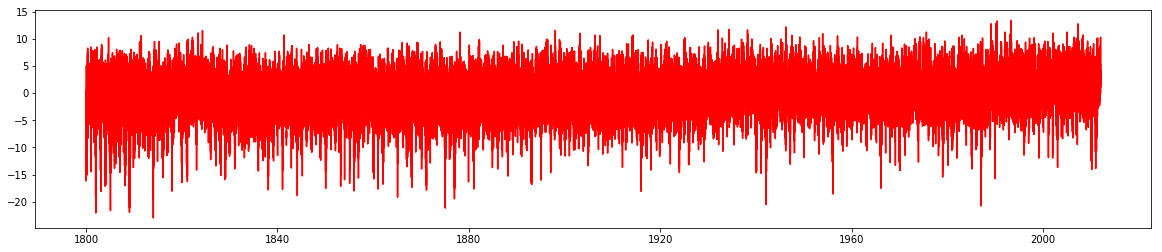

In [21]:
des_st = np.zeros(len(stockholm),dtype=float)
b = 0
for a in range(len(stockholm)):
    des_st[a] = stockholm[a][3] - yaT366[b]
    b += 1
    if a in yp:
        b = 0
plt.figure(figsize=(20, 4))
plt.plot(dates, des_st,'r-')
plt.show()

In [22]:
print(len(des_st))

77431


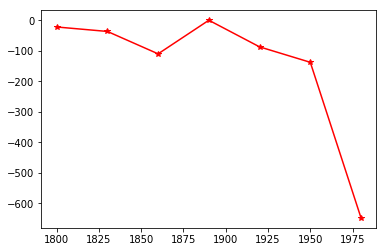

In [23]:
px = []
py = []
for i in range(0,210,30):
    px.append(1800 + i)
    py.append(stats.ttest_ind(des_st[:-30*365], des_st[int(i*365.25):int((i + 30)*365.25)])[1])
plt.figure(figsize=(6, 4))
plt.plot(px, np.log(np.array(py)),'r-*')
plt.show()

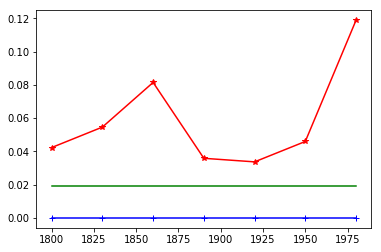

In [24]:
calpha=[1.073,1.224,1.517,1.858]
n1 = len(des_st)
n2 = int(30*365.25)
px = []
py1 = []
py2 = []
for i in range(0,210,30):
    px.append(1800 + i)
    py1.append(stats.ks_2samp(des_st, des_st[int(i*365.25):int((i + 30)*365.25)])[0])
    py2.append(stats.ks_2samp(des_st, des_st[int(i*365.25):int((i + 30)*365.25)])[1])
plt.figure(figsize=(6, 4))
plt.plot(px, py1, 'r-*')
plt.plot(px, py2, 'b-+')
plt.plot(px, np.array(px)*0+np.sqrt((n1+n2)/n1/n2)*calpha[3], 'g-')
plt.show()

***

### Machine learning

In [25]:
from sklearn import datasets, neighbors, linear_model

digits = datasets.load_digits()
X_digits = digits.data
y_digits = digits.target

n_samples = len(X_digits)

X_train = X_digits[:int(.9 * n_samples)]
y_train = y_digits[:int(.9 * n_samples)]
X_test = X_digits[int(.9 * n_samples):]
y_test = y_digits[int(.9 * n_samples):]

knn = neighbors.KNeighborsClassifier()
logistic = linear_model.LogisticRegression()

print('KNN score: %f' % knn.fit(X_train, y_train).score(X_test, y_test))
print('LogisticRegression score: %f'
      % logistic.fit(X_train, y_train).score(X_test, y_test))
#np.random.shuffle(y_train)

KNN score: 0.961111


C:\Users\szmnk\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\szmnk\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression score: 0.938889


In [26]:
# Print to show there are 1797 images (8 by 8 images for a dimensionality of 64)
print("Image Data Shape" , digits.data.shape)

# Print to show there are 1797 labels (integers from 0-9)
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


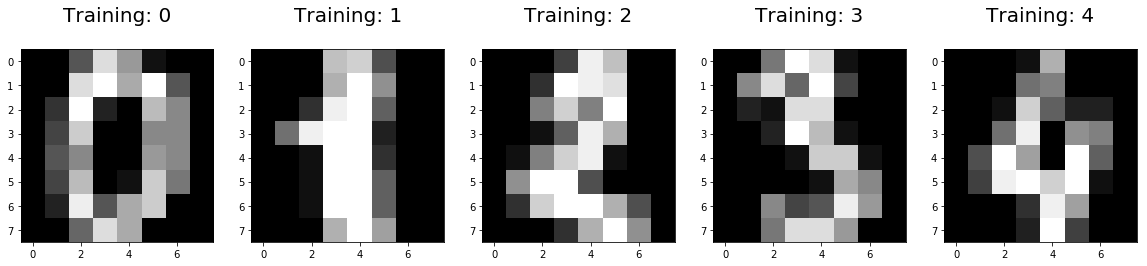

In [27]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

In [28]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=0)

In [29]:
from sklearn.linear_model import LogisticRegression
# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression()

In [30]:
logisticRegr.fit(x_train, y_train)

C:\Users\szmnk\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\szmnk\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

[2]


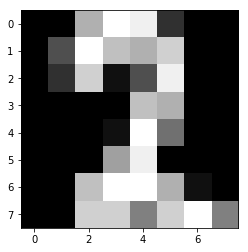

In [31]:
#print(x_test[0])
plt.imshow(np.reshape(x_test[0], (8,8)), cmap=plt.cm.gray)
print(logisticRegr.predict(x_test[0].reshape(1,-1)))

In [32]:
predictions = logisticRegr.predict(x_test)

In [33]:
# Use score method to get accuracy of model
score = logisticRegr.score(x_test, y_test)
print(score)

0.9533333333333334


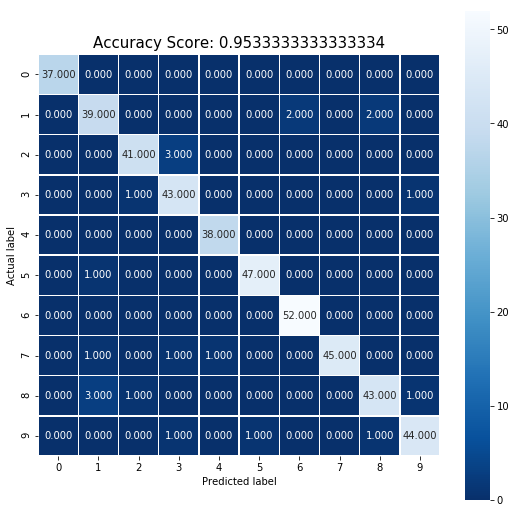

In [34]:
from sklearn import metrics
import seaborn as sns
cm = metrics.confusion_matrix(y_test, predictions)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

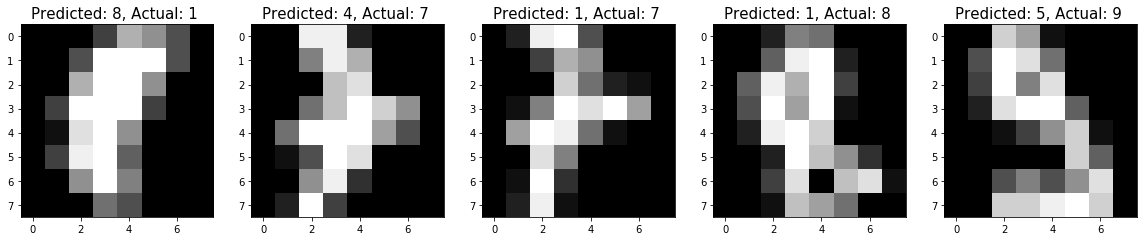

In [207]:
index = 0
misclassifiedIndexes = []
for label, predict in zip(y_test, predictions):
    if label != predict: 
        misclassifiedIndexes.append(index)
    index +=1
plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:5]):
    plt.subplot(1, 5, plotIndex + 1)
    plt.imshow(np.reshape(x_test[badIndex], (8,8)), cmap=plt.cm.gray)
    #plt.title('Predicted: {}, Actual: {}'.format(predictions[badIndex], y_test[badIndex]), fontsize = 15)
    plt.title('Predicted: %d, Actual: %d ' % (predictions[badIndex], y_test[badIndex]), fontsize = 15)

### Neural network

In [35]:
from sklearn.neural_network import MLPClassifier
# all parameters not specified are set to their defaults
mlp = MLPClassifier()

In [36]:
mlp.fit(x_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

[2]


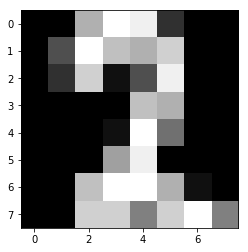

In [37]:
#print(x_test[0])
plt.imshow(np.reshape(x_test[0], (8,8)), cmap=plt.cm.gray)
print(mlp.predict(x_test[0].reshape(1,-1)))

In [38]:
predictions = mlp.predict(x_test)

In [39]:
# Use score method to get accuracy of model
score = mlp.score(x_test, y_test)
print(score)

0.9622222222222222


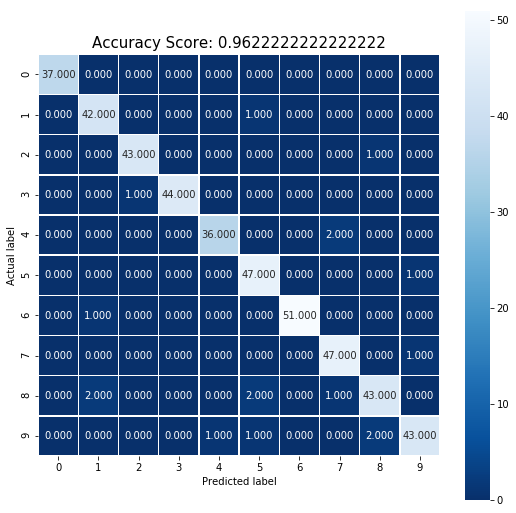

In [40]:
from sklearn import metrics
import seaborn as sns
cm = metrics.confusion_matrix(y_test, predictions)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

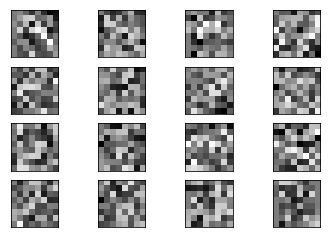

In [215]:
fig, axes = plt.subplots(4, 4)
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(8, 8), cmap=plt.cm.gray, vmin=.6 * vmin,
               vmax=.6 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

In [43]:
# File is at http://www.phy.bme.hu/~torok/mnist_784.csv
import pandas as pd
df=pd.read_csv('mnist_784.csv',header=0,sep=',')
df.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9


In [44]:
X = np.array(df.loc[:, 'pixel1':'pixel784'])

In [45]:
y = np.array(df['class'])

Iteration 1, loss = 2.30222621
Iteration 2, loss = 2.29845610
Iteration 3, loss = 2.29135929
Iteration 4, loss = 2.26888326
Iteration 5, loss = 2.20639346
Iteration 6, loss = 2.06941267
Iteration 7, loss = 1.92703561
Iteration 8, loss = 1.76834761
Iteration 9, loss = 1.64020621
Iteration 10, loss = 1.50084808
Iteration 11, loss = 1.40511551
Iteration 12, loss = 1.27633213
Iteration 13, loss = 1.18608694
Iteration 14, loss = 1.09225343
Iteration 15, loss = 1.00376774
Iteration 16, loss = 0.98893160
Iteration 17, loss = 0.89607106
Iteration 18, loss = 1.61934783
Iteration 19, loss = 1.35828880
Iteration 20, loss = 1.31629339


C:\Users\szmnk\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training set score: 0.413983
Test set score: 0.430100


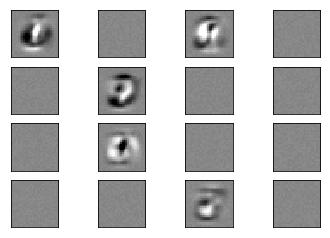

In [47]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier

# Load data from https://www.openml.org/d/554
#X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
X = X / 255.

# rescale the data, use the traditional train/test split
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

# mlp = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=400, alpha=1e-4,
#                     solver='sgd', verbose=10, tol=1e-4, random_state=1)
mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=20, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.1)

mlp.fit(X_train, y_train)
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

fig, axes = plt.subplots(4, 4)
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()